# Explanation

KNN stands for k-nearest neighbor. KNN is a supervised maching learning algortihm that can be used for both classification and regression problems. KNN classifier identifies the class of a data point using the majority voting principle. k is our hyperparameter tool in this case. If k was equal to 5, the classes of the 5 nearest points are examined. KNN regression takes the mean value of 5 nearest locations. We consider close data points by measuring its distance between the target point and nearby points using the Euclidean formula.
## Euclidean Formula
![](https://miro.medium.com/v2/resize:fit:1400/1*9LeaMTcOXxeTPN-VCbKloQ.png)

In this example I will be determining if my 3D target point is closer to the classified red points or blue points using the KNN algortihm.

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Defining Data
We are defining our 3D points of blue and red and defining the euclidean distance formula.

In [2]:
points = {'blue' : [[2,4,3], [1,3,5], [2,3,1], [3,2,3], [2,1,6]],
          'red' : [[5,6,5], [4,5,2], [4,6,1], [6,6,1], [10,10,4]]}

new_point = [3,3,4]

def euclidean_dis(p, q):
  return np.sqrt(np.sum(np.array(p)- np.array(q))**2)

# KNN Class


In [3]:
class KNearestNeighbors:

  def __init__(self, k=5):
    self.k = k
    self.point = None

  def fit(self, points):
    self.points = points

  def predict(self, new_point):
    """
    Predicts the category of a new point.

    Args:
    new_point: A list of coordinates.

    Returns:
    The predicted category.
    """
    distances = []
    for category in self.points:
      for point in self.points[category]:
        distance = euclidean_dis(point, new_point)
        distances.append([distance,category])
    categories = [category[1] for category in sorted(distances)[:self.k]]
    result = Counter(categories).most_common(1)[0][0]
    return result

# Predictions & Visualizations


In [4]:
clf = KNearestNeighbors()
clf.fit(points)
print(clf.predict(new_point))

blue


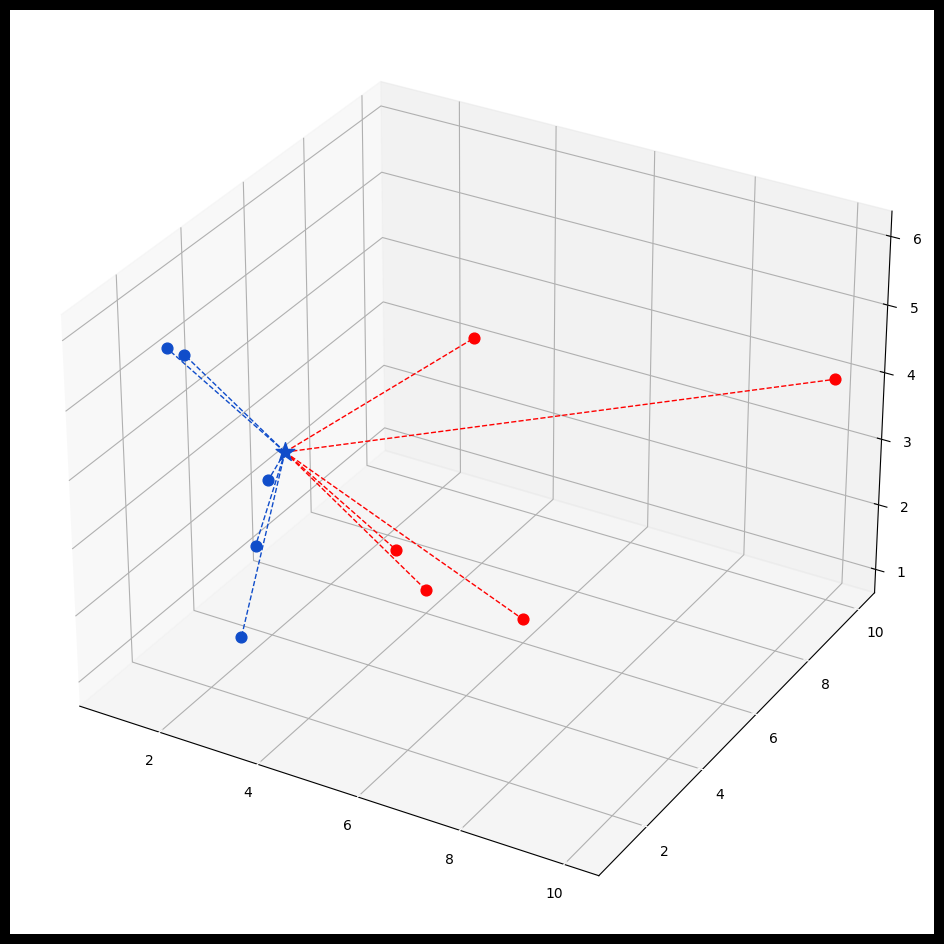

In [8]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(projection='3d')
ax.grid(True, color='#323232')
ax.figure.set_facecolor('black')
ax.tick_params(axis='x', color='white')
ax.tick_params(axis='y', color='white')
for point in points['blue']:
  ax.scatter(point[0], point[1], point[2], color='#104DCA', s=60)

for point in points['red']:
  ax.scatter(point[0], point[1], point[2], color='#FF0000', s=60)

new_class = clf.predict(new_point)
color = '#FF0000' if new_class == 'red' else '#104DCA'
ax.scatter(new_point[0], new_point[1], point[2], color=color, marker='*', s=200, zorder=100)

for point in points['blue']:
  ax.plot([new_point[0], point[0]], [new_point[1], point[1]], [new_point[2], point[2]], color='#104DCA', linestyle='--', linewidth=1)

for point in points['red']:
  ax.plot([new_point[0], point[0]], [new_point[1], point[1]], [new_point[2], point[2]], color='#FF0000', linestyle='--', linewidth=1)

plt.show()

# Strengths & Weaknesses

**Strengths:**
  * Simple and easy to understand and implement.
  * Requires no training time, so it can be used for new data without retraining.
  * Can be used for both classification and regression problems.
  * Robust to noisy data.
  * Effective in high-dimensional spaces.

**Weaknesses:**
  * Can be computationally expensive, especially for large datasets.
  * Sensitive to the choice of the hyperparameter K.
  * Can be sensitive to outliers.
  * Not as good as other algorithms for small datasets.